In [66]:
import pandas as pd
import glob

# Path ke folder yang berisi file CSV
folder_path = "D:\Documents\Tugas Akhir\Recommender System\Dataset\*.csv"

# Ambil semua file CSV dalam folder
csv_files = glob.glob(folder_path)

# List untuk menyimpan data dari setiap file
dataframes = []

# Loop untuk membaca setiap file CSV
for file in csv_files:
    print(f"Membaca file: {file}")
    df = pd.read_csv(file,  sep=';', encoding='ISO-8859-1')
    dataframes.append(df)


Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Acne_Cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\acne_pimple_patch.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Ampoule.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\booster.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Clay_Mask.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_Balm.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Bar_Powder.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Gel.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Oil.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_wipes.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Essence.csv
M

In [67]:
df = dataframes[0] 
df.head()

,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [ ]:
for i, df in enumerate(dataframes):
    print(f"File ke-{i+1} memiliki kolom: {df.columns.tolist()}")


In [68]:
# Gabungkan semua data CSV menjadi satu DataFrame
skincare = pd.concat(dataframes, ignore_index=True)

# Cek hasilnya
skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [69]:
skincare.shape

(2820, 8)

In [57]:
print(skincare.isna().sum())


name            0
brand           0
price           0
ingredients     0
rating          0
sub-category    0
category        0
benefit         0
dtype: int64


In [58]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2820 non-null   object 
 1   brand         2820 non-null   object 
 2   price         2820 non-null   object 
 3   ingredients   2820 non-null   object 
 4   rating        2820 non-null   float64
 5   sub-category  2820 non-null   object 
 6   category      2820 non-null   object 
 7   benefit       2820 non-null   object 
dtypes: float64(1), object(7)
memory usage: 176.4+ KB


In [70]:
import re

# Fungsi untuk mengubah hanya harga pertama dari rentang
def convert_currency(price):
    price = str(price)

    # Jika harga dalam rentang, ambil harga pertama sebelum '-'
    if ' - ' in price:
        price_first = price.split(' - ')[0]
    else:
        price_first = price  # Jika harga hanya satu (bukan rentang)
    
    # Menghapus karakter non-digit dan konversi ke angka
    price_first = re.sub(r'\D', '', price_first)
    return int(price_first)

# Terapkan fungsi ke kolom 'price'
skincare['price'] = skincare['price'].apply(convert_currency)

skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,229000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,39500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,120320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,65000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,100000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [72]:
skincare['price'].min()

6250

In [75]:
# Simpan gabungan data ke file baru
skincare.to_csv("D:\Documents\Tugas Akhir\Recommender System\skincare.csv", index=False)

In [1]:
import pandas as pd
skincare = pd.read_csv("skincare.csv")

In [2]:
skincare.head()

,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,229000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,39500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,120320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,65000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,100000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


### Statistika Deskriptif

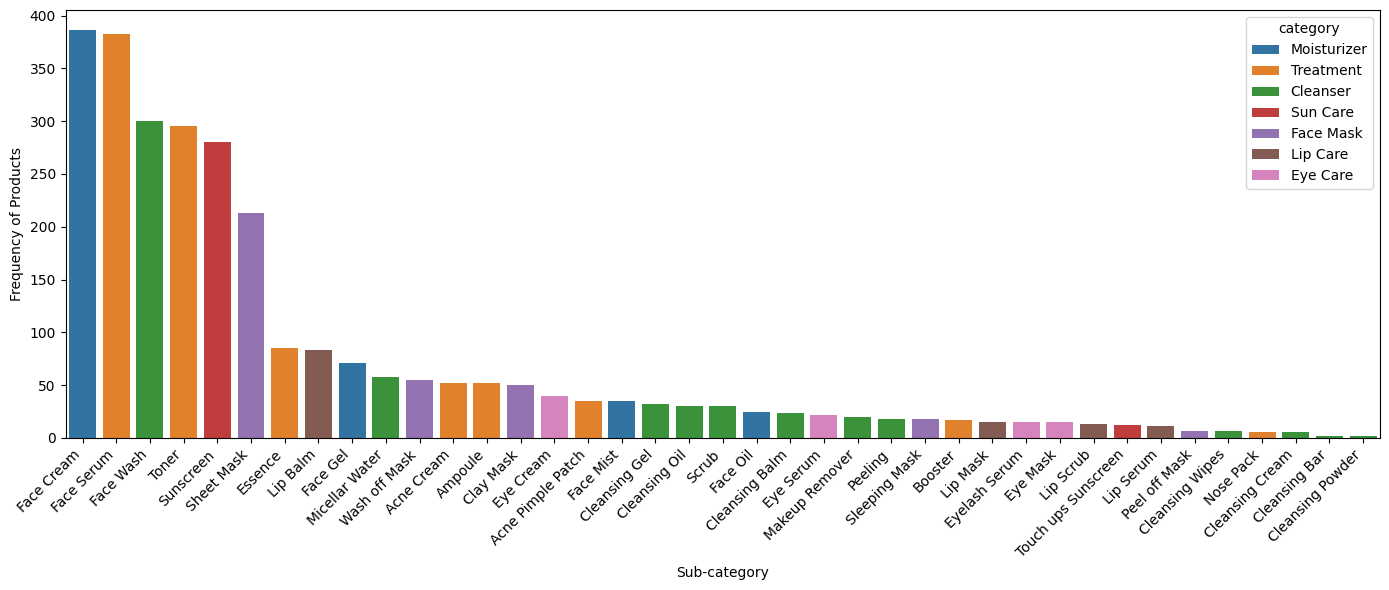

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Hitung frekuensi produk
skincare['cat_subcat'] = skincare['category'] + ' / ' + skincare['sub-category']
freq = skincare['cat_subcat'].value_counts().reset_index()
freq.columns = ['cat_subcat', 'count']

# Pisahkan kembali untuk visualisasi
freq[['category', 'sub-category']] = freq['cat_subcat'].str.split(' / ', expand=True)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=freq, x='sub-category', y='count', hue='category', dodge=False)

# Rotate x-labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sub-category')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()


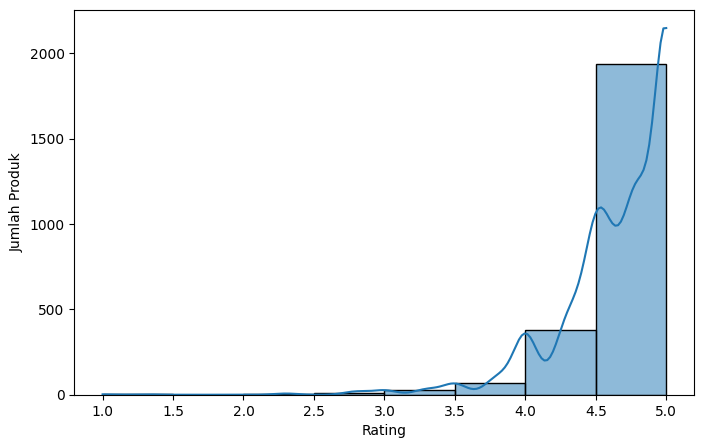

In [8]:
# Buang data yang belum ada rating
df_rated = skincare[skincare['rating'] > 0]

# Visualisasi rating yang valid
plt.figure(figsize=(8, 5))
sns.histplot(df_rated['rating'], bins=8, kde=True)
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')
plt.show()


C:\Users\Euis\AppData\Local\Temp\ipykernel_11840\1312824444.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_frequency.index, y=brand_frequency.values, palette='viridis')


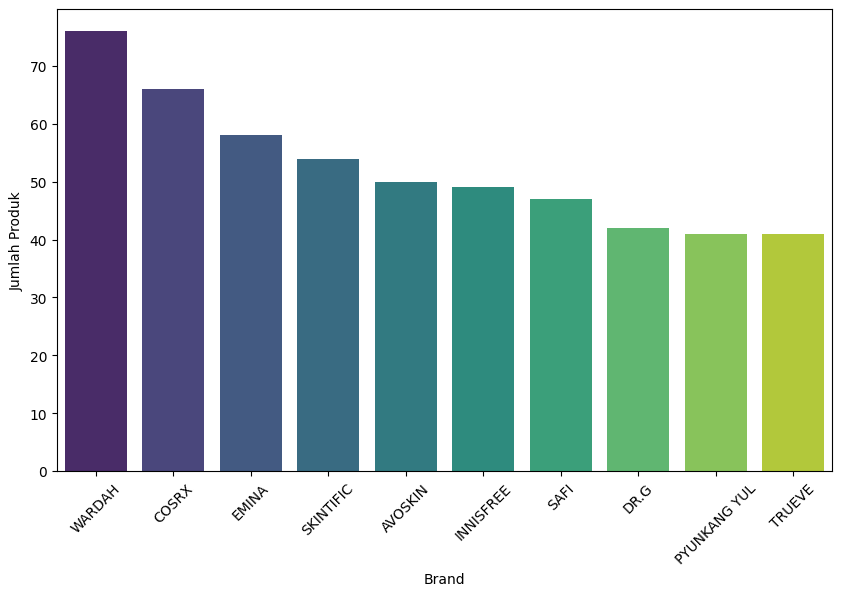

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan skincare adalah DataFrame yang sudah ada
# Menghitung frekuensi produk per brand
brand_frequency = skincare['brand'].value_counts().head(10)

# Visualisasi Top 10 brand dengan frekuensi produk terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_frequency.index, y=brand_frequency.values, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)
plt.show()


C:\Users\Euis\AppData\Local\Temp\ipykernel_11240\2615571184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')


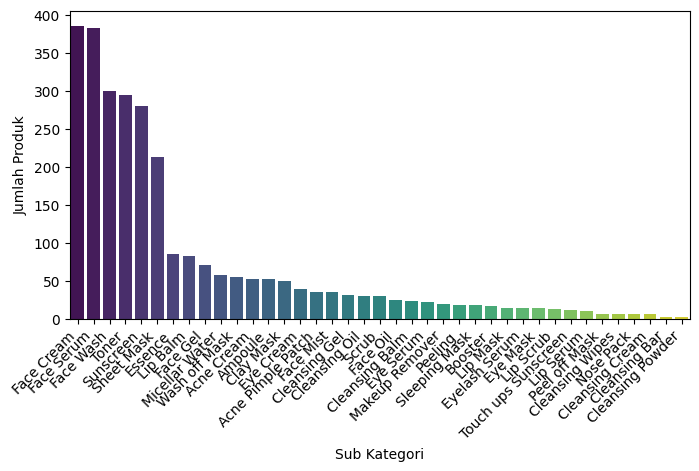

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk per sub kategori
sub_cat_count = skincare['sub-category'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha='right')
plt.show()

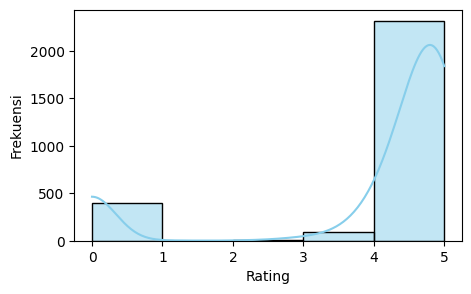

In [78]:
# Plot histogram rating
plt.figure(figsize=(5, 3))
sns.histplot(skincare['rating'], bins=5, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\Euis\AppData\Local\Temp\ipykernel_11240\1625285020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='category', y='price', data=skincare, palette='muted')


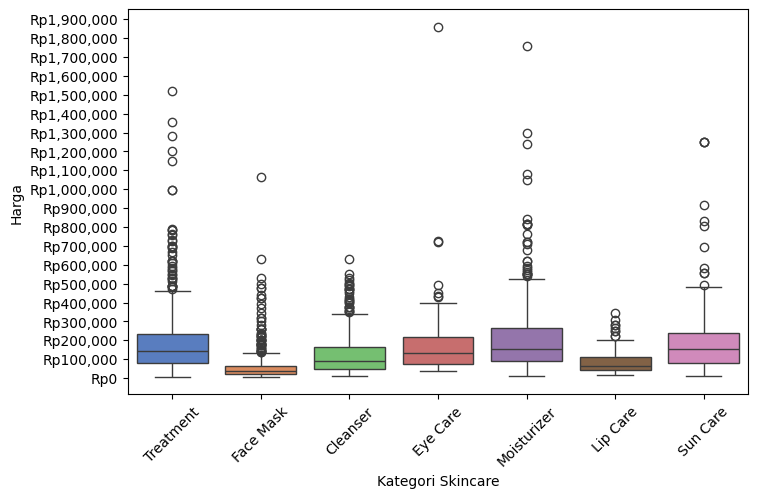

In [79]:
import matplotlib.ticker as mticker

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='category', y='price', data=skincare, palette='muted')

# Format sumbu Y ke dalam format rupiah
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'))

# Tambahkan lebih banyak tick marks di sumbu Y
ax.yaxis.set_major_locator(mticker.MultipleLocator(100000)) 

# Tambahkan label dan title
plt.xlabel('Kategori Skincare')
plt.ylabel('Harga')

# Rotasi label kategori supaya tidak bertumpuk
plt.xticks(rotation=45)

plt.show()


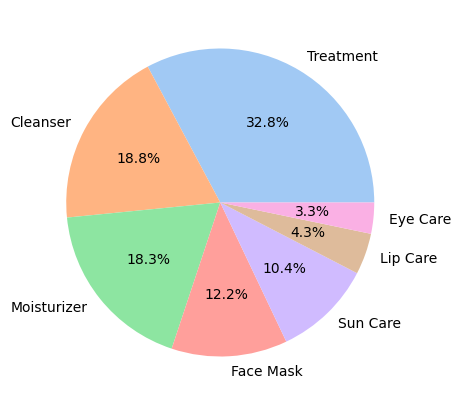

In [80]:
plt.figure(figsize=(6, 5))
category_counts = skincare['category'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.show()